# Lab 1 Analyzing Bokmässan Tweets

## Preparatory task for the laboratory
 
Before you get started with the lab, you need to familiarize yourself with the Jupyter environment.  Take a look at the `Lab 0` exercises 1-4:

- [Lab 0 / Exercise 1: Notebook_Basics](Lab0_Ex1_Notebook_Basics.ipynb)
- [Lab 0 / Exercise 2: Running Code](Lab0_Ex2_Running_Code.ipynb)
- [Lab 0 / Exercise 3: Working with Markdown Cells](Lab0_Ex3_Working_with_Markdown_Cells.ipynb)
- [Lab 0 / Exercise 4: Notebook Exercises](Lab0_Ex4_Notebook_Exercises.ipynb)

To learn more detailed Python programming you can also study chapters 1-9 from the free online book [Python for Everybody](https://www.py4e.com/html3/), however it is not essential to completing the labs.

Once you are familiar with Jupyter, we can now try out a simple analysis of Twitter data with a focus on data cleansing.

Firstly, we need to load the relevant Python modules that we will use in the code later by running the next code cell. In this cell, we use the `import` command to load five modules:

1. `pandas` - A collection of utilities to load and manipulate data tables.
1. `textmining` - Functions for statistical text mining, focused on the bag-of-words model.
1. `wordcloud` - A visualization module that generates wordclouds.
1. `matplotlib` -  A 2D plotting library to create figures such as charts and plots.
1. `sklearn` -  Scikit-learn, a library of machine learning algorithms.

In [1]:
# Run this cell to import the modules and set up some stuff
import pandas as pd
import textmining as tm
import wordcloud
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
# the following two lines set up our visualization settings
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]
# finally, the next couple of lines set up our auto-grader
from client.api.notebook import Notebook
ok = Notebook('lab1.ok')

Assignment: Lab 1 Analyzing Bokmässan Tweets
OK, version v1.14.19



## Analysis of Twitter data from the book fair

You have been hired as consultants by a book publisher who wants you to find out which themes and books have generated attention on Twitter during the 2016 book fair in Gothenburg.

Your task is to find out if there is any topic that has been particularly hot on Twitter before the book fair and during the book fair and to present a proposal to the company on what themes seem to create debate. In this lab we focus on data preparation. In order to prepare data, it is important to understand data

**Q1.1.** What do you think is distinctive Twitter data and how will this effect how we might want to pre-process the data?

Provide your answer by editing the cell below:

*Edit this cell to type your answer here*

*Hint: Double-click on this cell to edit it, then to exit edit-mode run the cell using the `Run` button in the toolbar above or press shift-return*.

## Data processing

Often, the data to be analyzed must be cleansed before we can use it. Data cleansing can include tasks such as dealing with missing values or, as in our case, filtering out some parts of the raw text data. Data you have been provided with was collected from Twitter during the period May 2016 to September 2016 during the "Book Fair" event.

The data can be found in the `lab1-data.tsv` file.

### Loading data

Start by loading data from a `.tsv` file. We can load this data from the Cloud using a URL that points to the file. A TSV (tab-separated variable) file where each line in the file corrsponds to a row of a table, and each cell in every row is delimited with a tab character.

You can load data into a `DataFrame` object using `pandas` with the following command:

In [2]:
bok_tweets = pd.read_csv(
    "https://s3.eu-west-2.amazonaws.com/uu-datamining-assets/lab1-data.tsv", 
    encoding="utf-8", sep="\t"
)

In Jupyter you can inspect variable `bok_tweets` by executing a cell with the variable name, as follows:

In [3]:
bok_tweets

,text,to_user_id,from_user,id,from_user_id,iso_language_code,source,profile_image_url,geo_type,geo_coordinates_0,geo_coordinates_1,created_at,time
0,rt @amiethekid: kvaellens avsnitt av raseriet ...,NaN,ornellanizii,780663045701955584,701149297,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:59:08 +0000 2016,1.474960e+09
1,maranatafoersamlingens monter paa bokmaessan v...,NaN,strrawbuz,780658066073198592,163765933,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:39:21 +0000 2016,1.474958e+09
2,idrotten blev en trygg zon under en jobbig ton...,NaN,birgittajekblom,780655458407383040,72873310,sv,"<a href=""http://twitter.com/download/iphone"" r...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:28:59 +0000 2016,1.474958e+09
3,tillbakablick paa #bokmaessan #goeteborg del 1...,NaN,kimmkimselius,780654308002062336,65428329,sv,"<a href=""https://about.twitter.com/products/tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:24:25 +0000 2016,1.474957e+09
4,"rt @flamman_: aha, vilken tid aer demon? hm, d...",NaN,annaherdy,780654122076962816,111971247,sv,"<a href=""https://about.twitter.com/products/tw...",http://abs.twimg.com/images/themes/theme17/bg.gif,NaN,0.0,0.0,tue sep 27 06:23:41 +0000 2016,1.474957e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rt @mxcartoons: nya tider kommenterar bokmaess...,NaN,zwepol,766966928837664768,2994150045,sv,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:55:40 +0000 2016,1.471694e+09
9996,rt @viskot: apropaa #bokmaessan och det haer m...,NaN,hannabergmans,766966926463668224,873555458,sv,"<a href=""http://twitter.com/download/iphone"" r...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:55:39 +0000 2016,1.471694e+09
9997,rt @charlieafnord: hej @bokmassangbg. kommer n...,NaN,gnellriksson,766966850693566464,2233508656,sv,"<a href=""http://twitter.com/download/android"" ...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:55:21 +0000 2016,1.471694e+09
9998,rt @mxcartoons: nya tider kommenterar bokmaess...,NaN,hedvigkrook,766966686113071104,3065329706,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:54:42 +0000 2016,1.471694e+09


To inspect the column names, use the `columns` attribute.

**Q1.2** Replace the ellipsis `...` with `bok_tweets.columns` to assign the column list to the variable named `columns` and run the cell:

In [4]:
columns = ...
columns

Ellipsis

#### Checking your answers

When providing some code answers, you can start using the built-in tests to check whether your work is correct.

Try not to change the contents of the test cells. Running the following cell will test whether you have assigned `columns` correctly in Question 1.2. If you haven't, this test will tell you the correct answer or give you feedback. Resist the urge to just copy it, and instead try to adjust your expression.

In [5]:
# Test cell; do not change these! Just run them to auto-check your answer in the immediately preceding section!
_ = ok.grade('q12')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
1.2 > Suite 1 > Case 2

>>> all(columns == ['text', 'to_user_id', 'from_user', 'id', 'from_user_id', 'iso_language_code', 'source', 'profile_image_url', 'geo_type', 'geo_coordinates_0', 'geo_coordinates_1', 'created_at', 'time'])
TypeError: 'bool' object is not iterable

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: 'bool' object is not iterable

Run only this test case with "python3 ok -q q12 --suite 1 --case 2"
---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 1
[oooook.....] 50.0% passed



To view the first few rows of a dataset, use the `head()`function with `3` as a parameter to tell the function to only load the first 3 records from `bok_tweets`. You can of course replace this with other numbers (try it):

In [4]:
bok_tweets.head(3)

,text,to_user_id,from_user,id,from_user_id,iso_language_code,source,profile_image_url,geo_type,geo_coordinates_0,geo_coordinates_1,created_at,time
0,rt @amiethekid: kvaellens avsnitt av raseriet ...,NaN,ornellanizii,780663045701955584,701149297,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:59:08 +0000 2016,1.474960e+09
1,maranatafoersamlingens monter paa bokmaessan v...,NaN,strrawbuz,780658066073198592,163765933,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:39:21 +0000 2016,1.474958e+09
2,idrotten blev en trygg zon under en jobbig ton...,NaN,birgittajekblom,780655458407383040,72873310,sv,"<a href=""http://twitter.com/download/iphone"" r...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:28:59 +0000 2016,1.474958e+09


To get some summary statistics on the dataset, use the `describe()` function:

In [5]:
bok_tweets.describe()

,id,from_user_id,geo_coordinates_0,geo_coordinates_1,time
count,1.000000e+04,1.000000e+04,9996.000000,9996.000000,9.996000e+03
mean,7.771100e+17,2.705030e+16,0.664916,0.140839,1.474187e+09
std,1.602894e+16,1.394526e+17,6.163928,1.311286,9.311175e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,1.471694e+09
25%,7.781674e+17,9.590491e+07,0.000000,0.000000,1.474365e+09
50%,7.789823e+17,3.919799e+08,0.000000,0.000000,1.474559e+09
75%,7.795877e+17,1.896645e+09,0.000000,0.000000,1.474703e+09
max,7.806630e+17,7.796813e+17,62.416700,18.055360,1.474960e+09


To get the shape of the dataset (length and width), use the `shape` attribute:

In [8]:
bok_tweets.shape

(10000, 13)

**Q1.3.** How many rows and columns are in the dataset? Provide your answer by replacing the ellipses `...` in the next cell with your answers.

In [9]:
number_of_rows = ...
number_of_columns = ...

In [10]:
_ = ok.grade('q13')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
1.3 > Suite 1 > Case 1

>>> number_of_rows == 10000
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q13 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



To get general information about the data set, such as how many values are not empty, use the `info()` function:

In [11]:
bok_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
text                 10000 non-null object
to_user_id           428 non-null object
from_user            9996 non-null object
id                   10000 non-null int64
from_user_id         10000 non-null int64
iso_language_code    10000 non-null object
source               10000 non-null object
profile_image_url    9589 non-null object
geo_type             115 non-null object
geo_coordinates_0    9996 non-null float64
geo_coordinates_1    9996 non-null float64
created_at           9996 non-null object
time                 9996 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.8+ KB


**Q1.4.** How many tweets the dataset are mentions to another user (i.e. an `@`, or a mention, is when you include somebody's `@twittername` in the tweet? 

*Hint: The count of non-null objects in `info()` imply that of values present in a particular column.*

In [12]:
number_of_mentions = ...

In [13]:
_ = ok.grade('q14')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
1.4 > Suite 1 > Case 1

>>> number_of_mentions == 428
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q14 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



**Q1.5.** Inspect the columns and contents of data. What part of data may be of interest for your analysis?

*Edit this cell to type your answer here*

A collection of documents containing text is usually called a corpus. We can create a corpus by extracting just the `text` column of `bok_tweets`. Pandas let's us do this by simply indexing the column using the dot accessor to the column name.

Run the next cell to extract the text from the data and create the corpus that you will work with:

In [6]:
tweets_corpus = bok_tweets.text
tweets_corpus

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3       tillbakablick paa #bokmaessan #goeteborg del 1...
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet – #bok...
Name: text, Length: 10000, dtype: object

dtype('O')

### Emojis

On Twitter it is common to use emojis 👍 ✨ 🐫 🎉 🚀 🤘.

When doing text analysis this can be useful because an emoji can contain a lot of information about what a person who wrote something means and what tone the text has. However, emojis may be problematic during analyses since coding of these is not necessarily compatible with the processing modules like NLTK.

Unfortunately, emojis creates problems for the features we use in this lab 😭 and you will therefore need to filter out emojis from the raw data.

Run the following cell that removes emojis from the `tweets` corpus:

In [9]:
encode2ascii = lambda x: x.encode('ascii', errors='ignore').decode('utf-8')
clean_tweets = tweets_corpus.apply(encode2ascii)
clean_tweets

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3       tillbakablick paa #bokmaessan #goeteborg del 1...
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet  #bokm...
Name: text, Length: 10000, dtype: object

**Q1.6.** How might removing emojis effect the quality of analysis? Explain your answer.

*Edit this cell to type your answer here*

### Remove URLs
On Twitter, it is common to link to locations on the Web using URLs. It is often the case that commonly occuring parts of URLs will end up among the most frequent words. It is therefore important to filter them out.

We can remove content that matches URL patterns with the following command:

In [16]:
clean_tweets = clean_tweets.str.replace(r'http\S+', '')
clean_tweets

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3        tillbakablick paa #bokmaessan #goeteborg del 1  
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet  #bokm...
Name: text, Length: 10000, dtype: object

**Q1.7** How might removing URLs effect the quality of analysis? Explain your answer.

*Edit this cell to type your answer here*

### Function for most frequent words

We will look for the most frequent words several times during this lab after each pre-processing step in order to compare the affect of the pre-processing. We will do the same operations several times, so therefore we will create a couple of functions to help us with our analysis.

#### What is a Term Document Matrix?

First, we create a term-document matrix (TDM), which can also referred to as a document-term matrix (DTM). A TDM gives us a table of the number of instances of a word for each document in a corpus. You should start by creating a TDM that is a representation of each tweet in terms of a feature vector. The feature vector creates an element for each word (unless excluded in the pre-processing, see further below). Thus, each element in the feature vector represents a word contained in one of the tweets. In the TDM you create, each line corresponds to the text of a tweet where all words that are not filtered out of the tweet are saved in the corresponding elements in the feature vector.

Our function `create_term_document_matrix()` to create a TDM is as follows:

In [17]:
def create_term_document_matrix(corpus, min_df=1):
    cvec = CountVectorizer(min_df=min_df, stop_words=tm.stopwords)
    tfmatrix = cvec.fit_transform(corpus)
    return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names())

For example, we can create a TDM for only the first three documents in our tweets corpus by using the `.head(3)` function on the `tweets_corpus`, similar to what we did at the beginning with `bok_tweets`.

Replace the ellipsis with in the next cell with the documents we wish to pass to the `create_term_document_matrix()` function:

In [20]:
create_term_document_matrix( tweets_corpus.head(3))

,amiethekid,av,avsnitt,blev,bok,bokmaessan,carolina,daer,dagensnyheter,du,...,rt,scqzukltmj,sin,tonaarstid,trygg,vandaliserad,vanligtvis,vplx4lem9v,wd1zzmeopy,zon
0,1,1,1,0,0,1,0,1,0,2,...,1,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,1,1,1,1,0,1,0,...,0,1,1,1,1,0,0,0,0,1


**Q1.8.** How many columns are created for our small TDM above?

In [19]:
number_of_tdm_columns = ...

In [20]:
_ = ok.grade('q18')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
1.8 > Suite 1 > Case 1

>>> number_of_tdm_columns == 39
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q18 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



To find the top words we will do a bit more work with our next function `plot_top_words()`. In this function we sum up each of the columns in the TDM, sort the word frequencies by counts, return the top sorted words list, and additionally plot these words in a nice bar chart.

In [24]:
def plot_top_words(tweets, num_word_instances, top_words):
    tdm_df = create_term_document_matrix(tweets, min_df=2)
    word_frequencies = tdm_df[[x for x in tdm_df.columns if len(x) > 1]].sum()
    sorted_words = word_frequencies.sort_values(ascending=False)
    top_sorted_words = sorted_words[:num_word_instances]
    top_sorted_words[:top_words].plot.bar()
    return top_sorted_words

After defining our own `plot_top_words()` function, we can use it by using the tweets corpus as input (be patient as it make take some time for the function to complete processing):

bokmaessan        9858
paa               5256
rt                4805
och               2918
aer               2351
om                2329
att               2047
med               1873
foer              1811
det               1740
som               1288
en                1261
till              1223
vi                1060
monter            1052
av                 995
inte               948
jag                945
nu                 890
svpol              850
haer               761
har                759
kl                 648
man                637
bokmassangbg       604
du                 602
nya                595
fraan              580
saa                550
yttrandefrihet     531
den                524
faar               521
amp                479
ett                477
hur                467
de                 460
idag               456
ska                446
naer               413
kom                411
samtal             409
alla               406
goeteborg          400
bokmassan  

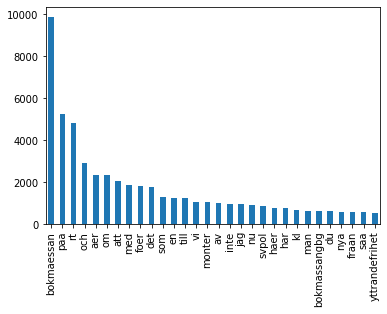

In [25]:
top_words = plot_top_words(clean_tweets, 50, 30)
top_words

**Q1.9** How many times must a word occur in your corpus for the function to appear in the top words list output above?

In [23]:
min_occurences_to_make_top_50_words = ...

In [24]:
_ = ok.grade('q19')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
1.9 > Suite 1 > Case 1

>>> min_occurences_to_make_top_50_words == 331
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q19 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



**Q1.10.** How many words does the function plot in the bar chart?

In [25]:
number_of_words_plotted_in_bar_chart = ...

In [26]:
_ = ok.grade('q110')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
1.10 > Suite 1 > Case 1

>>> number_of_words_plotted_in_bar_chart == 30
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q110 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



### Lowercase

The next step is to redo all the words in lowercase letters. You do this to avoid identiftyinhg the same words as different ones, when written in different cases. For example before transforming the whole corpus into lowercase letters, the word `Bokmaessan`and `bokmaessan` may be identified as different words.

To change the `clean_tweets` corpus into lower case text, use the following command:

In [26]:
tweets_lowered = clean_tweets.str.lower()

In the next cell, write some code to plot the top words again with the lowered tweets corupus. Replace the ellipsis (`...`) with your own code:

bokmaessan        9858
paa               5256
rt                4805
och               2918
aer               2351
om                2329
att               2047
med               1873
foer              1811
det               1740
som               1288
en                1261
till              1223
vi                1060
monter            1052
av                 995
inte               948
jag                945
nu                 890
svpol              850
haer               761
har                759
kl                 648
man                637
bokmassangbg       604
du                 602
nya                595
fraan              580
saa                550
yttrandefrihet     531
den                524
faar               521
amp                479
ett                477
hur                467
de                 460
idag               456
ska                446
naer               413
kom                411
samtal             409
alla               406
goeteborg          400
bokmassan  

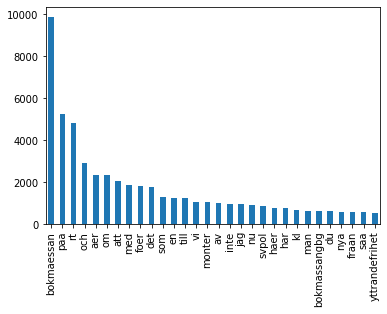

In [27]:
top_words_lowered = plot_top_words(tweets_lowered, 50, 30)
top_words_lowered

**Q1.11.** What do you observe in the data after plotting the lowered tweets, and why?

*Edit this cell to type your answer here*

In the next cell, you can use the code to compare your different lists with the most common words. The code creates a table using the `DataFrame` class, with the indexes of both top tweets corpuses as inputs.

This code lets us preview the top 20 tweets, where the range given in the square brackets `[0:20]` defines which part of the top words lists are used. For example `[5:40]` will give you the 5th to 40th words in the list. You can try changing the range values if you like.

In [22]:
pd.DataFrame({
    'Top tweeted clean': top_words[0:20].index,
    'Top tweeted lowered': top_words_lowered[0:20].index
})

NameError: name 'top_words' is not defined

You can use the following code to check the words in two top words lists they are identical:

In [30]:
set(top_words[0:20].index) - set(top_words_lowered[0:20].index)

TypeError: 'ellipsis' object is not subscriptable

If the lists of top words are identical, the cell will return only `set()`, otherwise it will list the words that are different.

**Q1.12.** Has the pre-processing of data you performed so far changed the list of the 20 most frequent words? Provide a reason for your observation.

*Edit this cell to type your answer here*

### Small words

Most small words are usually of limited importance, so let's strip those out. We can simply use a regular expression to identify words that are 3 letters long and keep them in the corpus.

In [31]:
tweets_low_no_small = tweets_lowered.str.findall('\w{3,}').str.join(' ')  # short words (2 chars)

bokmaessan        9858
paa               5256
och               2918
aer               2351
att               2047
med               1873
foer              1811
det               1740
som               1288
till              1223
monter            1052
inte               948
jag                945
svpol              850
haer               761
har                759
man                637
bokmassangbg       604
nya                595
fraan              580
saa                550
yttrandefrihet     531
den                524
faar               521
amp                479
ett                477
hur                467
idag               456
ska                446
naer               413
kom                411
samtal             409
alla               406
goeteborg          400
bokmassan          375
tider              374
men                366
vaar               366
kan                364
sig                331
aar                306
vad                288
bok                284
vill       

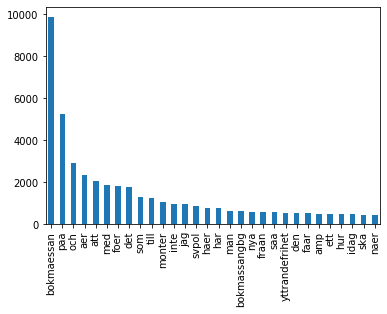

In [32]:
top_words_low_no_small = plot_top_words(tweets_low_no_small, 50, 30)
top_words_low_no_small

**Q1.13.** Now after removing short words, how many times must a word occur in your corpus for the function to appear in the top words list output above?

In [33]:
min_occurences_to_make_top_50_words_short_words = ...

In [34]:
_ = ok.grade('q113')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
1.13 > Suite 1 > Case 1

>>> min_occurences_to_make_top_50_words_short_words == 255
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q113 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



### Stop Words

Stop words are words of limited importance and are therefore not so interesting for your analysis. We use stop words as a reference so that we can filter out words that we do not want to analyze, for example prepositions and conjunctions.

First, we can create a list of stopwords that we can use to remove from the most frequent word collection:

In [39]:
my_stop_words = ["och", "det", "att", "i", "en", "jag", "hon", 
                "som", "han", "paa", "den", "med", "var", "sig", 
                "foer", "saa", "till", "aer", "men", "ett", 
                "om", "hade", "de", "av", "icke", "mig", "du", 
                "henne", "daa", "sin", "nu", "har", "inte", 
                "hans", "honom", "skulle", "hennes", "daer", 
                "min", "man", "ej", "vid", "kunde", "naagot", 
                "fraan", "ut", "naer", "efter", "upp", "vi", 
                "dem", "vara", "vad", "oever", "aen", "dig", 
                "kan", "sina", "haer", "ha", "mot", "alla", 
                "under", "naagon", "eller", "allt", "mycket", 
                "sedan", "ju", "denna", "sjaelv", "detta", 
                "aat", "utan", "varit", "hur", "ingen", "mitt", 
                "ni", "bli", "blev", "oss", "din", "dessa", 
                "naagra", "deras", "blir", "mina", "samma", 
                "vilken", "er", "saadan", "vaar", "blivit", 
                "dess", "inom", "mellan", "saadant", "varfoer", 
                "varje", "vilka", "ditt", "vem", "vilket", 
                "sitta", "saadana", "vart", "dina", "vars", 
                "vaart", "vaara", "ert", "era", "vilka", "kvaellens"]

Then we can define a function `remove_stopwods` that removes the stop words from a single document. We then use the `.apply()` function to apply the function across the whole of the `tweets_lowered_no_urls` corpus to delete these words:

In [40]:
remove_stopwords = lambda x: ' '.join(y for y in x.split() if y not in my_stop_words)
tweets_low_no_small_stopwords = tweets_low_no_small.apply(remove_stopwords)
tweets_low_no_small_stopwords

0       amiethekid avsnitt raseriet hittar vanligtvis ...
1       maranatafoersamlingens monter bokmaessan vanda...
2       idrotten trygg zon jobbig tonaarstid carolina ...
3                  tillbakablick bokmaessan goeteborg del
4       flamman_ aha tid demon krockar nyponarrangeman...
                              ...                        
9995    mxcartoons nya tider kommenterar bokmaessans n...
9996    viskot apropaa bokmaessan yttrandefrihet tror ...
9997    charlieafnord hej bokmassangbg kommer tillaata...
9998    mxcartoons nya tider kommenterar bokmaessans n...
9999    dolf371 tystnad yttrandefrihet bokmaessan moer...
Name: text, Length: 10000, dtype: object

bokmaessan         9858
monter             1052
svpol               850
bokmassangbg        604
nya                 595
yttrandefrihet      531
faar                521
amp                 479
idag                456
ska                 446
kom                 411
samtal              409
goeteborg           400
bokmassan           375
tider               374
aar                 306
bok                 284
vill                278
just                270
plats               265
kommer              259
itorget             247
boecker             233
finns               227
pratar              226
tack                216
pedagogikscenen     210
charlieafnord       204
bibliotek           198
seminarium          191
saeger              184
dag                 183
bara                183
lyssna              182
vaelkommen          178
c04                 176
hos                 176
barn                175
missa               175
skaems              169
bra                 169
maaste          

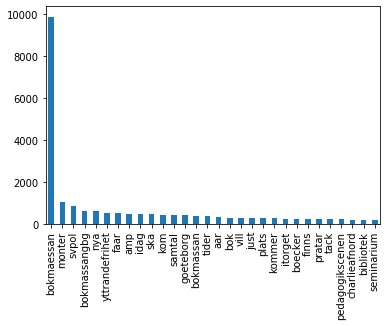

In [37]:
top_words_low_no_small_stopwords = plot_top_words(tweets_low_no_small_stopwords, 50, 30)
top_words_low_no_small_stopwords

**Q1.14.** Now after removing stop words, how many times must a word occur in your corpus for the function to appear in the top words list output above?

In [ ]:
min_occurences_to_make_top_50_words_short_stop_words = ...

In [ ]:
_ = ok.grade('q114')

**Q1.15.** What are the differences between the most frequent words compared to the previous pre-processed lists?

*Hint: To help with your answer, read a little further to create a comparison table.*

*Edit this cell to type your answer here*

Write some code to create a table showiung the top 20 words at each stage of pre-processing by comparing `top_words_lowered`, `top_words_low_no_small` and `top_words_low_no_small_stopwords` to help you answer this question.

In the code cell below replace the ellipsis with your own code and run it to create your comparison table:

In [ ]:
'Top tweeted lowered': top_words_lowered[0:20].index
'Top words low no small': top_words_low_no_small[0:20].index
'Top words low no small stopwords': top_words_low_no_small_stopwords[0:20].index

### Add your own stopwords

Now you can choose to add your own stop words if you think there are words in the graph that are not so informative to determine what kind of topics discussed at the book fair. For example, you could remove `years` as represented in the text with` aar`. Write your own code in the cell below and run it to remove your own stop words:

*Check the earlier example code that removes the initial list of stop words if you are not sure how to do this.*

In [ ]:
more_stop_words = [ ... ]

remove_more_stopwords = lambda x: ' '.join(y for y in x.split() if y not in more_stop_words)
tweets_low_no_small_more_stopwords = tweets_low_no_small_stopwords.apply(remove_more_stopwords)
top_words_no_small_more_stopwords = plot_top_words(tweets_low_no_small_more_stopwords, 50, 30)
top_words_no_small_more_stopwords

**Q1.16.** What stop words did you add and why? Did you notice any further problems?

*Edit this cell to type your answer here*

In [ ]:
_ = ok.grade('q116')  # if your extra stop words removed more, this test should pass!

### Visualization of analysis and recommendation

Now you will create a visualization that will help you convince the company why they should focus on this particular topic. A common way of visualizing commonly used words in a text is by using a word cloud.

You create a word cloud using the following code:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=40)
wordcloud.fit_words(top_words_no_small_more_stopwords.to_dict())
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The code above creates a word cloud with words from the `top_words_no_small_more_stopwords` list. Run the next cell to generate a word cloud with the `top_words_low_no_small_stopwords` list.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=40)
wordcloud.fit_words(top_words_low_no_small_stopwords.to_dict())
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Compare your word clouds

Create word clouds for at least two of your top words lists to compare how the pre-processing has affected the word clouds. You can also change the minimum frequency for a word to end up in the word cloud. If you think any words should be deleted, you can go back to an earlier step and add it to your stop word list and re-run the cells afterwards.

**Q1.17.** Are there any words that are not as informative that you removed to improve visualization? Explain why you removed any additional words.

*Edit this cell to type your answer here*

**Q1.18.** What theme would you recommend the book publisher to target next year? Explain your answer.

*Edit this cell to type your answer here*

**Q1.19.** Now that you have explored some Twitter data, what do you now think are the interesting characteristics of this kind of data? How does it affect how you must pre-process data?

*Edit this cell to type your answer here*

---
*When you are finished*, save your work in this notebook to upload to Studium.

Choose **Save and Checkpoint** from the **File** menu, then choose **Download as HTML** from the **File** menu and save it to your computer (the filename saved should be `Lab1_Analyzing_Bokmässan_Tweets.html`).

Then on the course page in *Studium* choose **Labb 1** and upload the HTML file and send the submission.